# Plotting class

Explains usage of dj plotting class 
- Tracking  
- Path spike 
- Ratemap
- 2D Autocorr
- HD tuning
- ROIs

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Set up basics
import datajoint as dj 

In [3]:
# Load base schema
schema = dj.schema(dj.config['dj_imaging.database'])
schema.spawn_missing_classes()

Connecting horsto@kavlidatajoint02.it.ntnu.no:3306


In [4]:
# Make plots prettier
import seaborn as sns
sns.set(style='white')
%config InlineBackend.figure_format = 'retina'

In [5]:
from dj_plotter import dj_plotter

### Only tracking

In [6]:
some_paths = Session * Tracking.OpenField & 'animal_name = "88592"'
len(some_paths)

18

Drawing path-spike plots:   0%|          | 0/5 [00:00<?, ?it/s]

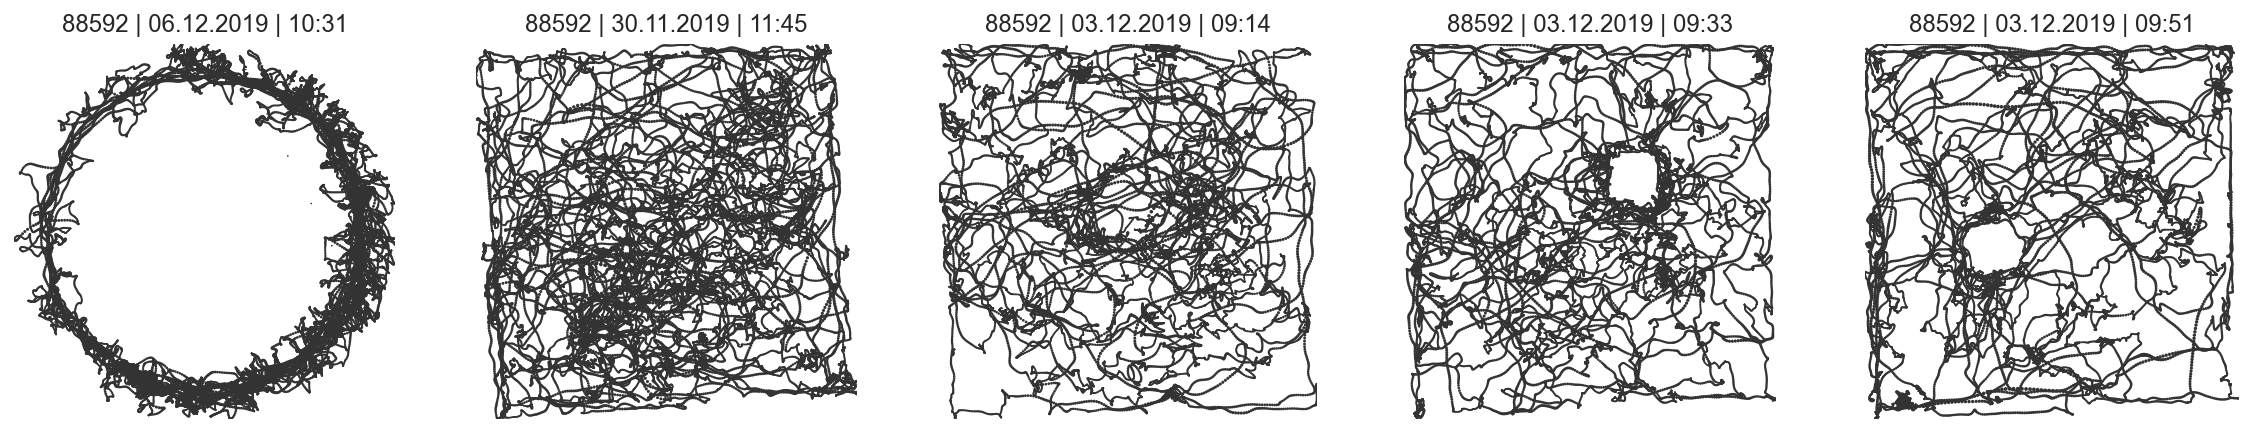

In [7]:
plot = dj_plotter(some_paths, total=5)
plot.tracking(draw_speed=True, draw_angle=False)

### Ratemaps

In [8]:
# Define some restrictions ... 
restriction_dict = {
    'map_params_id' : 'A',
    'signal_type'   : 'spikes',
}

In [9]:
some_ratemaps = Session * Ratemap * GridScore  \
                & 'animal_name = "88592"' \
                & 'gridscore > .9' \
                & restriction_dict

In [10]:
keys = some_ratemaps.proj('gridscore').fetch(order_by='gridscore DESC')
print(len(keys))

317


Drawing ratemaps:   0%|          | 0/5 [00:00<?, ?it/s]

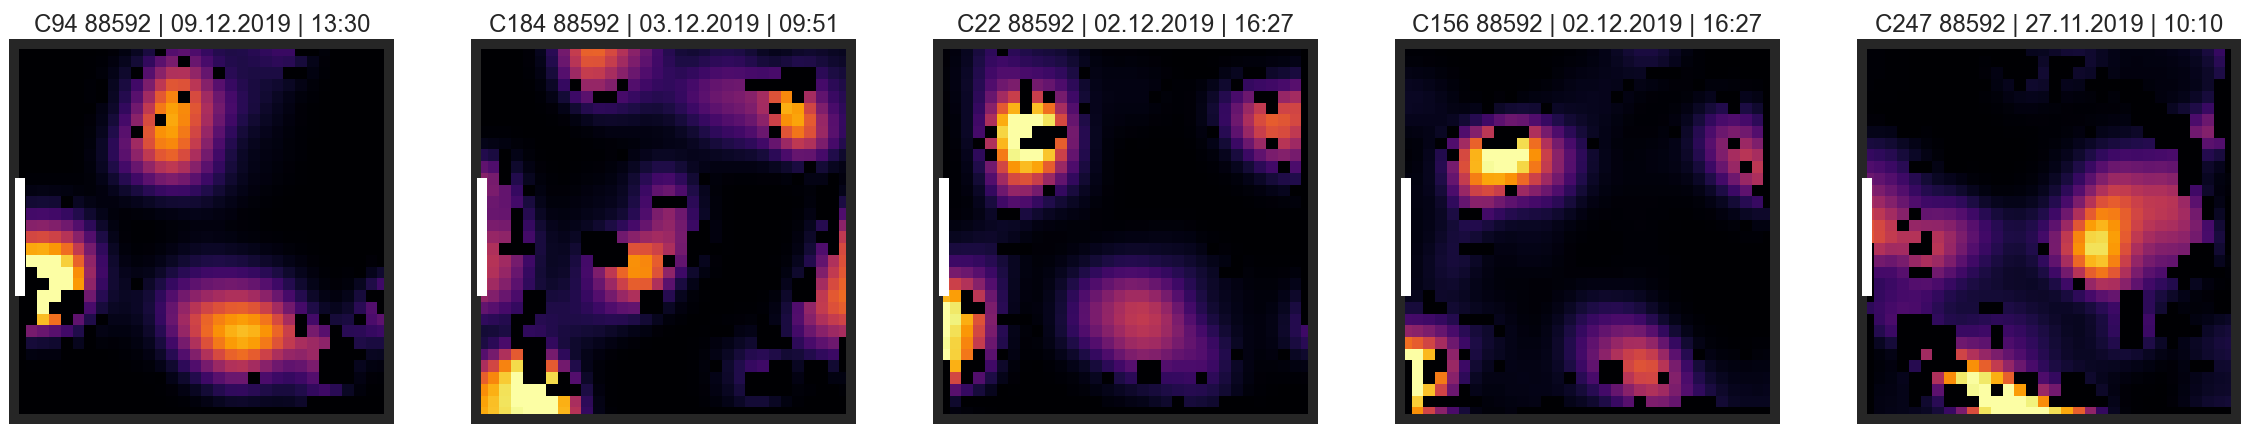

In [11]:
plot = dj_plotter(some_ratemaps, keys, total=5)
plot.ratemaps(hash_or_animal='animal', cue_card_pos='west', cmap='inferno')

Drawing autocorrelations:   0%|          | 0/5 [00:00<?, ?it/s]

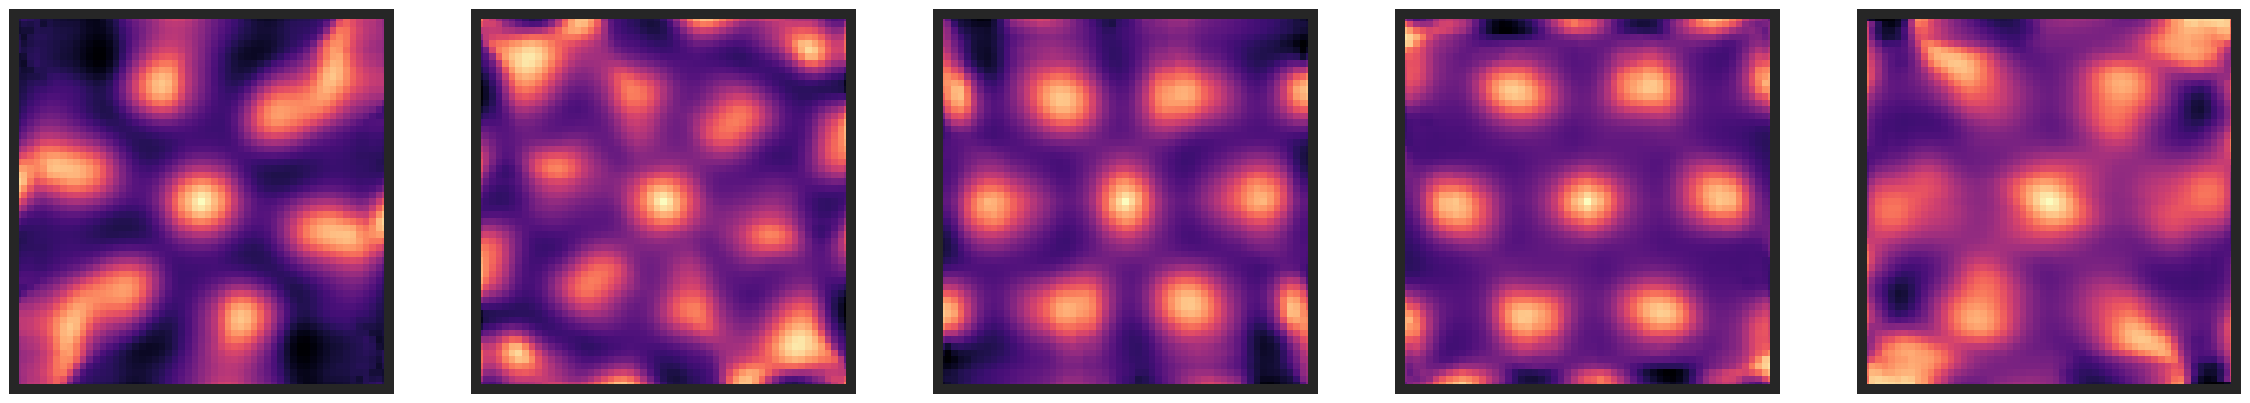

In [12]:
plot.autocorr(display_title=False)

In [13]:
plot

DJ plotter class
Available attributes:
['metasession_name', 'session_order', 'session_name', 'signal_dataset', 'cell_id', 'channel', 'spike_filter_id', 'tracking_dataset', 'trackingparams_id', 's_t_params_id', 'signal_type', 'map_params_id', 'field_params_id', 'grid_params_id', 'animal_id', 'datasource_id', 'animal_name', 'timestamp', 'combined', 'timeseries_name', 'experiment_type', 'username', 'ratemap', 'ratemap_raw', 'mask_rm', 'binned_raw', 'bin_max', 'max', 'no_fields', 'fields_map', 'gridscore', 'acorr']

### Figure saving

In [14]:
save_path = '/Users/hotte/Desktop/brainreg segment'

Drawing ratemaps:   0%|          | 0/1 [00:00<?, ?it/s]

Saving figure under /Users/hotte/Desktop/brainreg segment


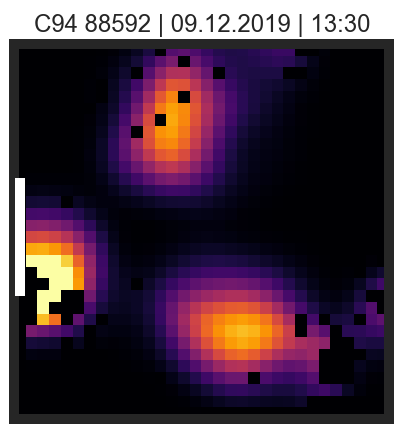

<Figure size 1440x1440 with 0 Axes>

In [15]:
# Initialize a plotter with `save_path` to auto-save figure to disk 
plot = dj_plotter(some_ratemaps, keys, total=1, plots_per_view=1, save_path=save_path, save_format='png')
plot.ratemaps(hash_or_animal='animal', cue_card_pos='west', cmap='inferno')

Drawing autocorrelations:   0%|          | 0/1 [00:00<?, ?it/s]

Saving figure under /Users/hotte/Desktop/brainreg segment


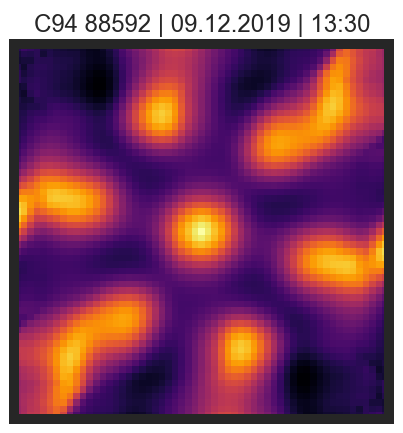

<Figure size 1440x1440 with 0 Axes>

In [16]:
plot.autocorr(hash_or_animal='animal', cue_card_pos='west', cmap='inferno')

### Path-spike plots

In [17]:
some_paths_spikes = Session * Tracking.OpenField * SignalTracking & keys

Drawing path-spike plots:   0%|          | 0/5 [00:00<?, ?it/s]

Saving figure under /Users/hotte/Desktop/brainreg segment


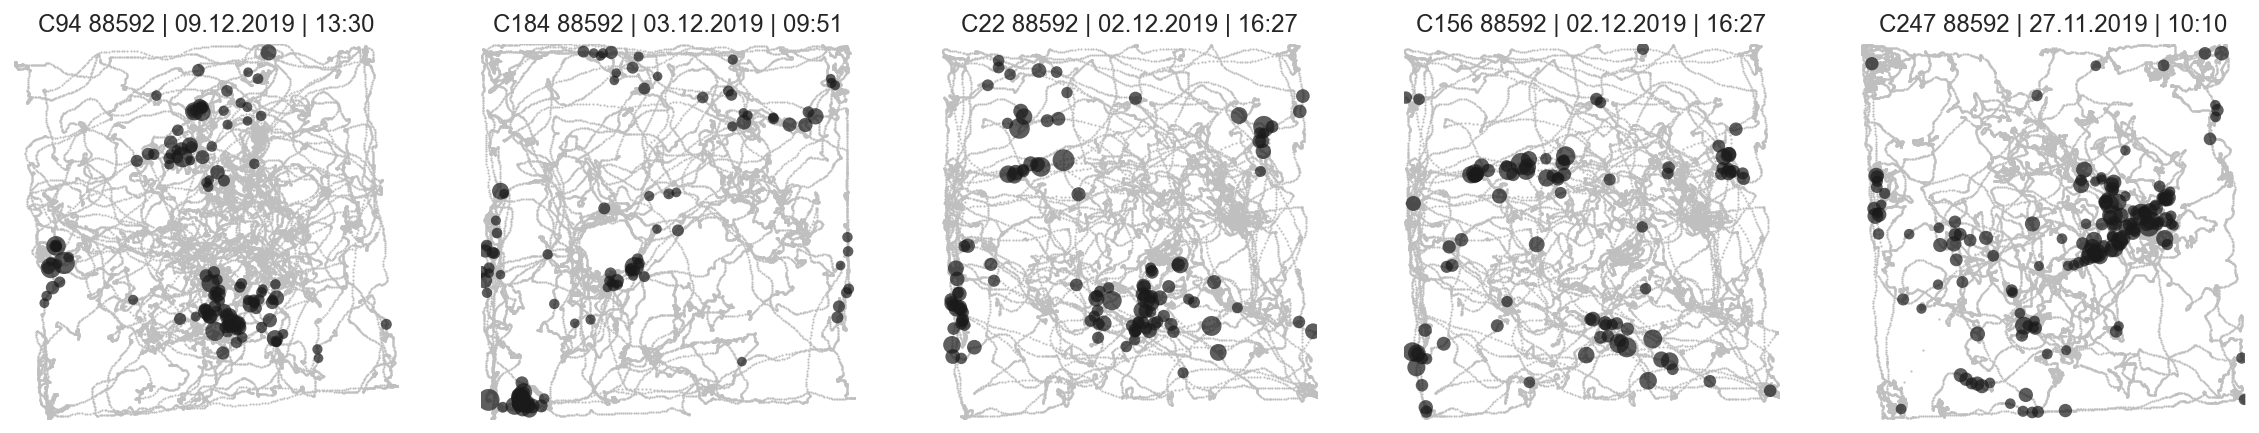

In [18]:
plot = dj_plotter(some_paths_spikes, keys, total=5, save_path=save_path, save_format='png')
plot.path_spike()

### HD tuning curves

In [19]:
some_hd_tuning = Session * AngularOccupancy * AngularRate * AngularRate.Stats & keys

Drawing HD tuning:   0%|          | 0/5 [00:00<?, ?it/s]

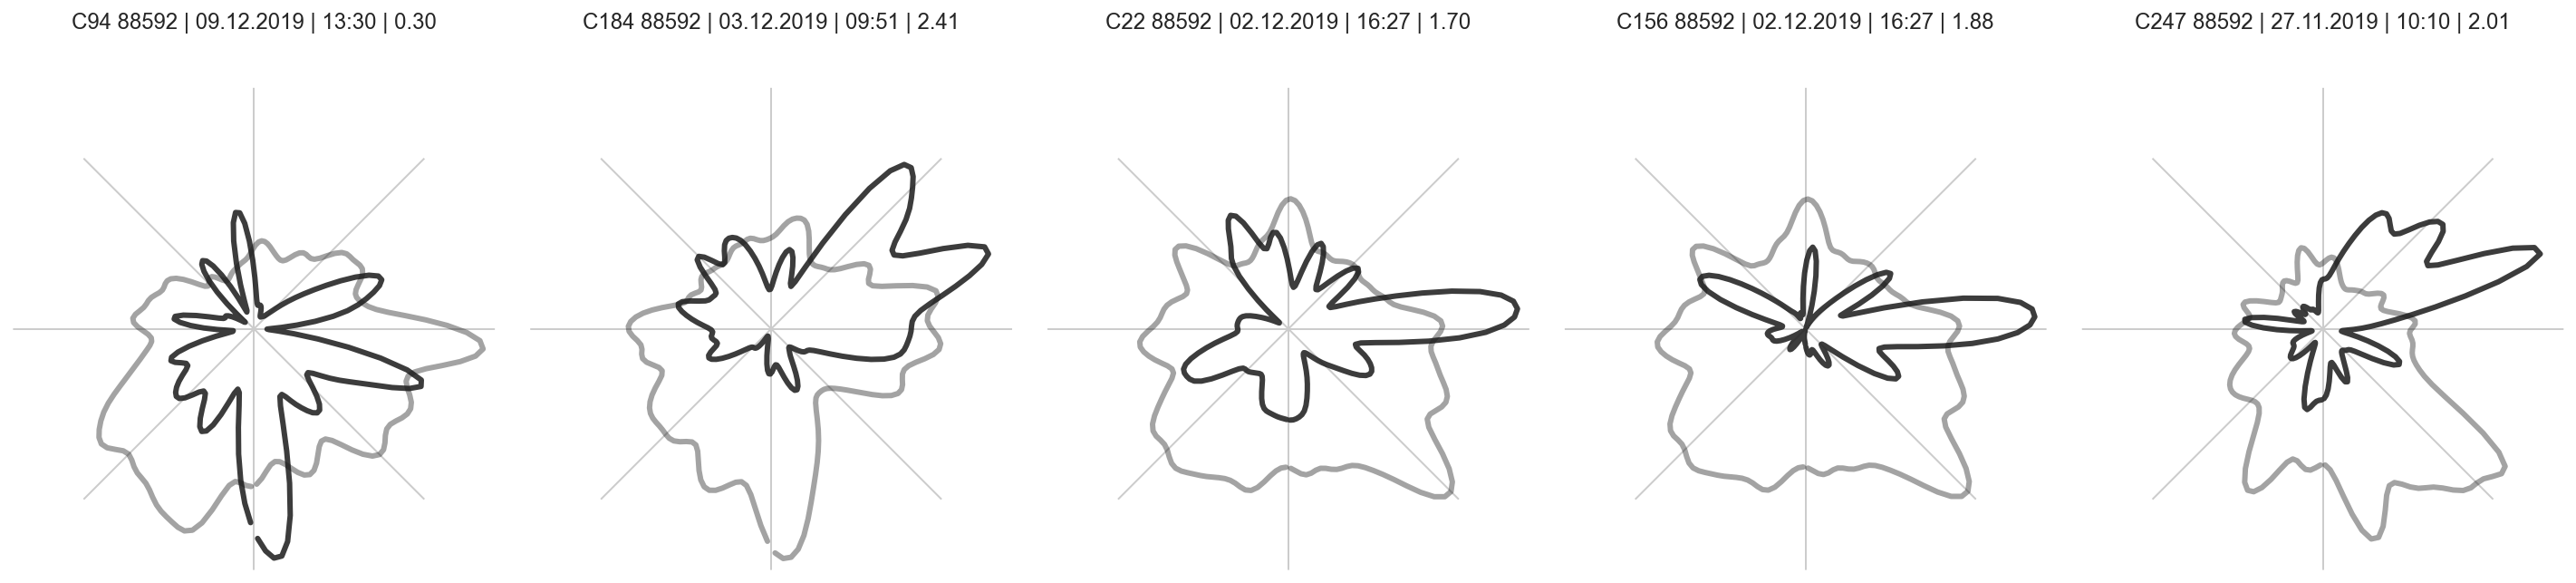

In [20]:
plot = dj_plotter(some_hd_tuning, keys, total=5)
plot.hdtuning(color_hd=False, display_score='angular_mean')

### Rois

In [21]:
session = Session.proj() & 'session_name = "1f20835f09e28706"'

In [22]:
some_cells = Session * Projection * Cell.Rois * GridScore * GridScore.Stats & session & restriction_dict
len(some_cells)

185

In [23]:
# Make your own color array, where cells with gridscore below a certain threshold are colored gray 
from dj_plotter.helpers.plotting_helpers import make_linear_colormap
gridscores, grid_spacings = (some_cells & restriction_dict).fetch('gridscore','gs_spacing')
colors = make_linear_colormap(grid_spacings, cmap='magma')
colors[gridscores < .5] = [.7, .7, .7]

Drawing ROIs:   0%|          | 0/185 [00:00<?, ?it/s]

Saving figure under /Users/hotte/Desktop/brainreg segment


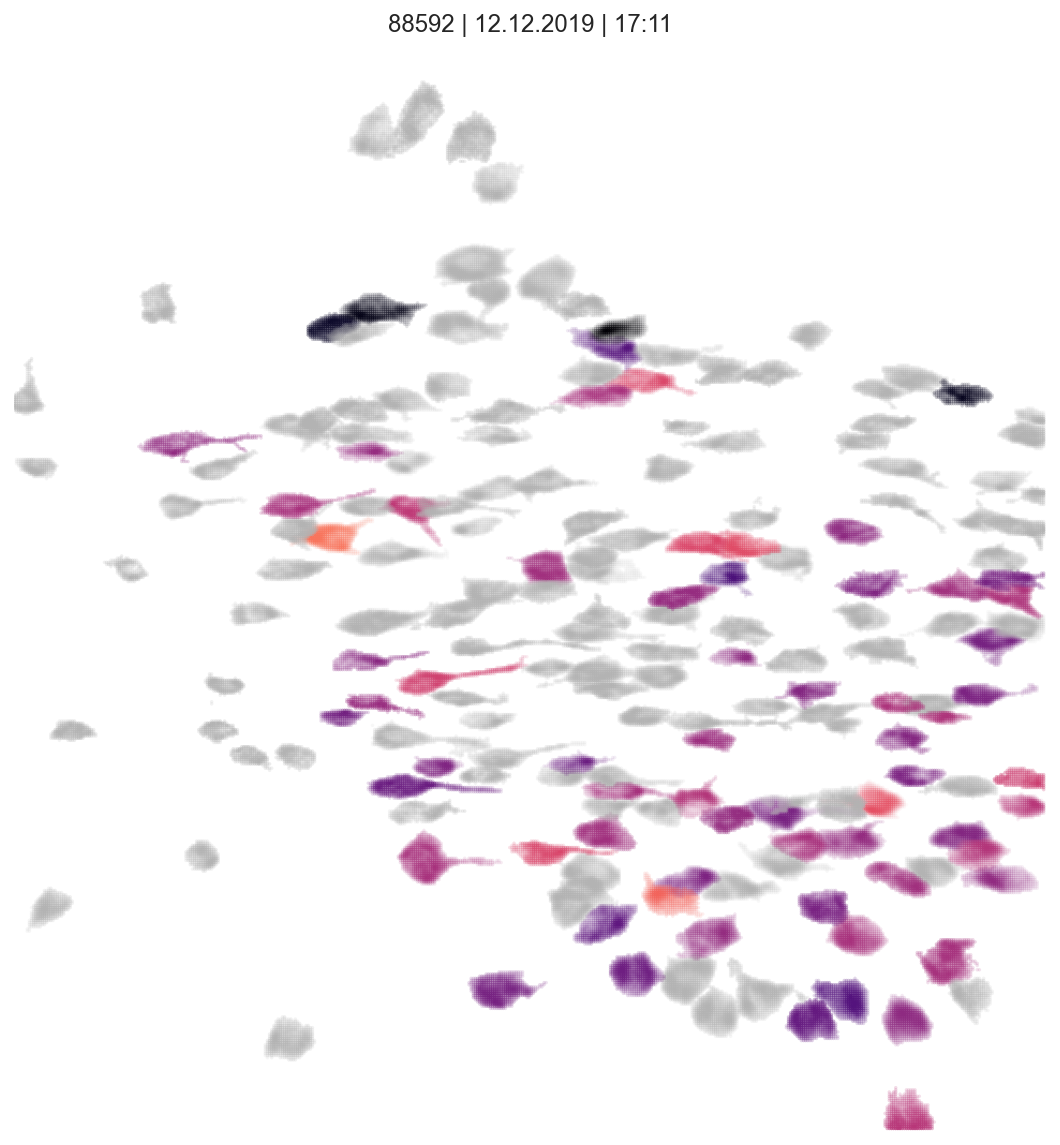

In [24]:
plot = dj_plotter(some_cells, save_path=save_path, save_format='png')
plot.rois(draw_image=False, draw_pixels=True, \
          draw_centers=False, draw_outlines=False, colors=colors)